# Step 6: Machine Learning Model Development(Team Member 6 and 7)

# Member 6 :Machine Learning Model Development

# PART 1 : Importing Necessary Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import warnings
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

# PART 2: Load and Read data

In [2]:
data = pd.read_csv('Road Accidents Dataset.csv')
df = pd.DataFrame(data)
df

,Accident_Severity,Day_of_Week,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,...,Year,Month,Day,Hour,Minute,is_high_accident_zone,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
0,2,4,14.724026,4,78.610393,1,1,3,3,60,...,2010,12,9,15,41,0,0,3,1,0
1,2,1,14.762353,3,78.534042,1,1,3,3,60,...,2010,12,27,21,31,0,0,3,1,0
2,2,1,14.745606,4,78.470877,1,2,5,3,30,...,2010,11,8,15,50,0,0,3,0,0
3,2,2,14.667128,4,78.557994,1,2,1,3,30,...,2010,10,16,13,50,0,0,3,0,0
4,2,5,14.703443,4,78.576431,1,1,4,1,30,...,2010,12,21,13,59,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85994,2,5,8.884765,4,76.621426,1,2,1,3,30,...,2010,8,24,15,45,0,0,3,0,0
85995,2,0,8.866606,4,76.669196,1,2,1,3,30,...,2010,10,1,17,14,0,0,3,0,1
85996,2,3,8.865684,4,76.639612,1,2,1,3,30,...,2010,8,29,18,19,0,0,3,0,1
85997,2,5,22.732825,1,77.106322,1,1,1,2,30,...,2010,8,31,22,55,0,0,0,0,0


In [3]:
df.head()

,Accident_Severity,Day_of_Week,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,...,Year,Month,Day,Hour,Minute,is_high_accident_zone,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
0,2,4,14.724026,4,78.610393,1,1,3,3,60,...,2010,12,9,15,41,0,0,3,1,0
1,2,1,14.762353,3,78.534042,1,1,3,3,60,...,2010,12,27,21,31,0,0,3,1,0
2,2,1,14.745606,4,78.470877,1,2,5,3,30,...,2010,11,8,15,50,0,0,3,0,0
3,2,2,14.667128,4,78.557994,1,2,1,3,30,...,2010,10,16,13,50,0,0,3,0,0
4,2,5,14.703443,4,78.576431,1,1,4,1,30,...,2010,12,21,13,59,0,0,3,1,0


In [4]:
df.tail()

,Accident_Severity,Day_of_Week,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,...,Year,Month,Day,Hour,Minute,is_high_accident_zone,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
85994,2,5,8.884765,4,76.621426,1,2,1,3,30,...,2010,8,24,15,45,0,0,3,0,0
85995,2,0,8.866606,4,76.669196,1,2,1,3,30,...,2010,10,1,17,14,0,0,3,0,1
85996,2,3,8.865684,4,76.639612,1,2,1,3,30,...,2010,8,29,18,19,0,0,3,0,1
85997,2,5,22.732825,1,77.106322,1,1,1,2,30,...,2010,8,31,22,55,0,0,0,0,0
85998,2,4,22.732825,1,77.106322,2,2,5,3,30,...,2010,8,26,22,0,1,0,0,0,0


In [ ]:
sns.pairplot(df)

# PART 3: Sanity Check of Data

In [5]:
#shape
df.shape

(85999, 22)

In [6]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85999 entries, 0 to 85998
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accident_Severity        85999 non-null  int64  
 1   Day_of_Week              85999 non-null  int64  
 2   Latitude                 85999 non-null  float64
 3   Light_Conditions         85999 non-null  int64  
 4   Longitude                85999 non-null  float64
 5   Number_of_Casualties     85999 non-null  int64  
 6   Number_of_Vehicles       85999 non-null  int64  
 7   Road_Surface_Conditions  85999 non-null  int64  
 8   Road_Type                85999 non-null  int64  
 9   Speed_limit              85999 non-null  int64  
 10  Urban_or_Rural_Area      85999 non-null  int64  
 11  Weather_Conditions       85999 non-null  int64  
 12  Year                     85999 non-null  int64  
 13  Month                    85999 non-null  int64  
 14  Day                   

In [7]:
#Finding missing values
missing_values=df.isnull().sum()         
missing_values

Accident_Severity          0
Day_of_Week                0
Latitude                   0
Light_Conditions           0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
Year                       0
Month                      0
Day                        0
Hour                       0
Minute                     0
is_high_accident_zone      0
Is_Fatal                   0
Location_Cluster           0
Is_Poor_Weather            0
Is_Rush_Hour               0
dtype: int64

In [8]:
#Finding percentage of missing values
missing_percentage = df.isnull().mean() *100        
print(missing_percentage)

Accident_Severity          0.0
Day_of_Week                0.0
Latitude                   0.0
Light_Conditions           0.0
Longitude                  0.0
Number_of_Casualties       0.0
Number_of_Vehicles         0.0
Road_Surface_Conditions    0.0
Road_Type                  0.0
Speed_limit                0.0
Urban_or_Rural_Area        0.0
Weather_Conditions         0.0
Year                       0.0
Month                      0.0
Day                        0.0
Hour                       0.0
Minute                     0.0
is_high_accident_zone      0.0
Is_Fatal                   0.0
Location_Cluster           0.0
Is_Poor_Weather            0.0
Is_Rush_Hour               0.0
dtype: float64


In [9]:
#Finding and dropping duplicates
print(df.duplicated().sum())
df.drop_duplicates()

0


,Accident_Severity,Day_of_Week,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,...,Year,Month,Day,Hour,Minute,is_high_accident_zone,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
0,2,4,14.724026,4,78.610393,1,1,3,3,60,...,2010,12,9,15,41,0,0,3,1,0
1,2,1,14.762353,3,78.534042,1,1,3,3,60,...,2010,12,27,21,31,0,0,3,1,0
2,2,1,14.745606,4,78.470877,1,2,5,3,30,...,2010,11,8,15,50,0,0,3,0,0
3,2,2,14.667128,4,78.557994,1,2,1,3,30,...,2010,10,16,13,50,0,0,3,0,0
4,2,5,14.703443,4,78.576431,1,1,4,1,30,...,2010,12,21,13,59,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85994,2,5,8.884765,4,76.621426,1,2,1,3,30,...,2010,8,24,15,45,0,0,3,0,0
85995,2,0,8.866606,4,76.669196,1,2,1,3,30,...,2010,10,1,17,14,0,0,3,0,1
85996,2,3,8.865684,4,76.639612,1,2,1,3,30,...,2010,8,29,18,19,0,0,3,0,1
85997,2,5,22.732825,1,77.106322,1,1,1,2,30,...,2010,8,31,22,55,0,0,0,0,0


In [10]:
#Filling Missing values with Mode and Median

df['Speed_limit'] = df['Speed_limit'].fillna(df['Speed_limit'].median())
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())
df

,Accident_Severity,Day_of_Week,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,...,Year,Month,Day,Hour,Minute,is_high_accident_zone,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
0,2,4,14.724026,4,78.610393,1,1,3,3,60,...,2010,12,9,15,41,0,0,3,1,0
1,2,1,14.762353,3,78.534042,1,1,3,3,60,...,2010,12,27,21,31,0,0,3,1,0
2,2,1,14.745606,4,78.470877,1,2,5,3,30,...,2010,11,8,15,50,0,0,3,0,0
3,2,2,14.667128,4,78.557994,1,2,1,3,30,...,2010,10,16,13,50,0,0,3,0,0
4,2,5,14.703443,4,78.576431,1,1,4,1,30,...,2010,12,21,13,59,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85994,2,5,8.884765,4,76.621426,1,2,1,3,30,...,2010,8,24,15,45,0,0,3,0,0
85995,2,0,8.866606,4,76.669196,1,2,1,3,30,...,2010,10,1,17,14,0,0,3,0,1
85996,2,3,8.865684,4,76.639612,1,2,1,3,30,...,2010,8,29,18,19,0,0,3,0,1
85997,2,5,22.732825,1,77.106322,1,1,1,2,30,...,2010,8,31,22,55,0,0,0,0,0


In [11]:
for i in df.select_dtypes(include ="object").columns:  #Identifying garbage values
     print(df[i].value_counts())
     print("***"*10)

In [12]:
#To check how our day of the week is odered
print(df['Day_of_Week'].unique())

[4 1 2 5 3 6 0]


In [13]:
#Reorder Day of the week 
day_of_week = df['Day_of_Week']
correct_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_of_Week'] = pd.Categorical(day_of_week, categories=correct_order, ordered=True)
df_sorted = df.sort_values('Day_of_Week')

In [14]:
print(df['Accident_Severity'].value_counts())

Accident_Severity
2    73688
1    11405
0      906
Name: count, dtype: int64


In [15]:
print("Current DataFrame columns after dropping:", df.columns.tolist()) 

Current DataFrame columns after dropping: ['Accident_Severity', 'Day_of_Week', 'Latitude', 'Light_Conditions', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'is_high_accident_zone', 'Is_Fatal', 'Location_Cluster', 'Is_Poor_Weather', 'Is_Rush_Hour']


# PART 4: Exploratory Data Analysis(EDA)

In [16]:
#Descriptive Statistics
df.describe()

,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,...,Year,Month,Day,Hour,Minute,is_high_accident_zone,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
count,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,...,85999.0,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000,85999.000000
mean,1.846312,21.607352,3.323969,79.094356,1.364283,1.837045,2.157967,2.464447,38.269980,0.668333,...,2010.0,6.622182,15.689275,13.529436,27.045710,0.346795,0.010535,1.471540,0.062419,0.403481
std,0.388767,5.997456,1.224365,6.595867,0.820359,0.706822,1.742736,1.109900,13.667557,0.470815,...,0.0,3.357828,8.772485,5.119570,17.445761,0.475952,0.102099,1.288732,0.241917,0.490599
min,0.000000,8.864429,0.000000,69.015103,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,...,2010.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18.494119,3.000000,73.988713,1.000000,1.000000,1.000000,3.000000,30.000000,0.000000,...,2010.0,4.000000,8.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,22.732825,4.000000,77.106322,1.000000,2.000000,1.000000,3.000000,30.000000,1.000000,...,2010.0,7.000000,16.000000,14.000000,29.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,26.762398,4.000000,80.336134,1.000000,2.000000,4.000000,3.000000,40.000000,1.000000,...,2010.0,10.000000,23.000000,17.000000,42.000000,1.000000,0.000000,2.000000,0.000000,1.000000
max,2.000000,31.068800,4.000000,94.231931,43.000000,19.000000,5.000000,5.000000,70.000000,1.000000,...,2010.0,12.000000,31.000000,23.000000,59.000000,1.000000,1.000000,4.000000,1.000000,1.000000


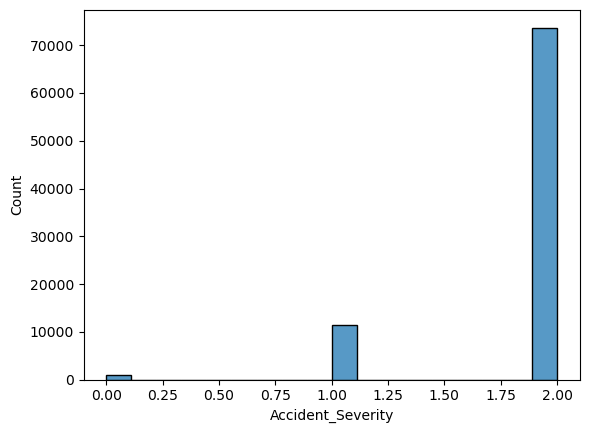

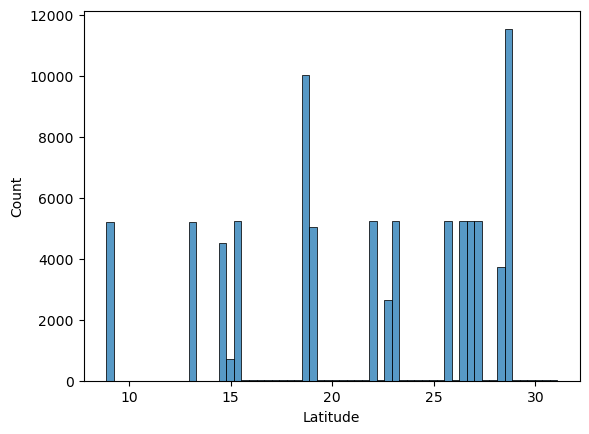

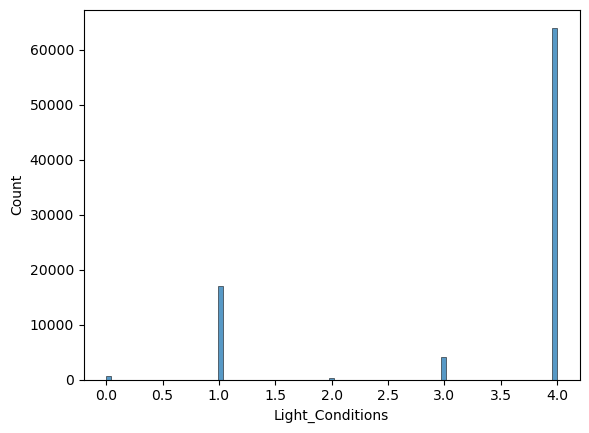

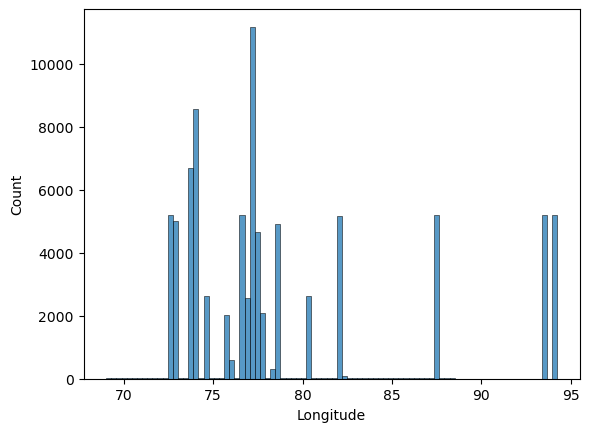

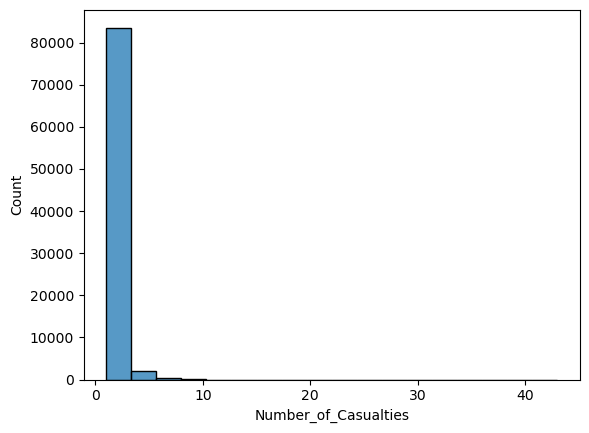

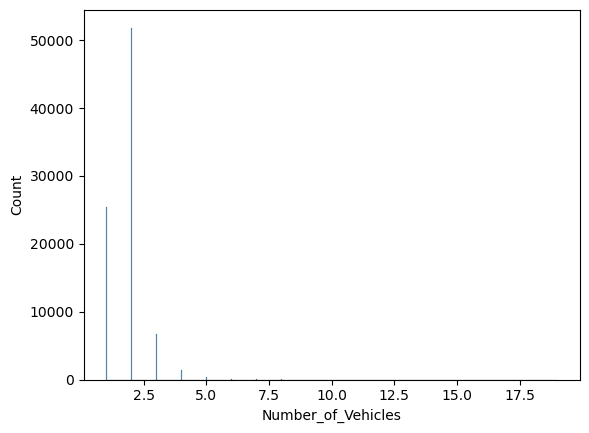

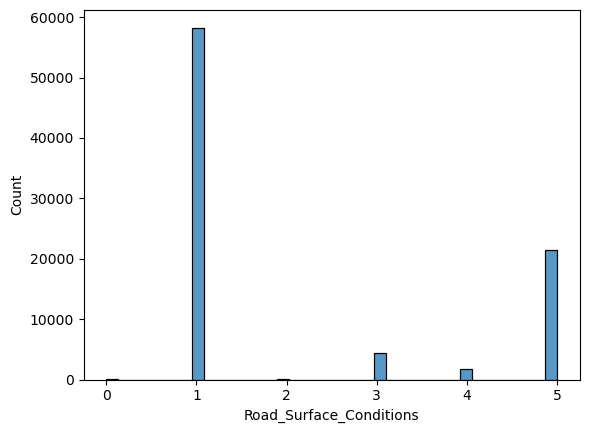

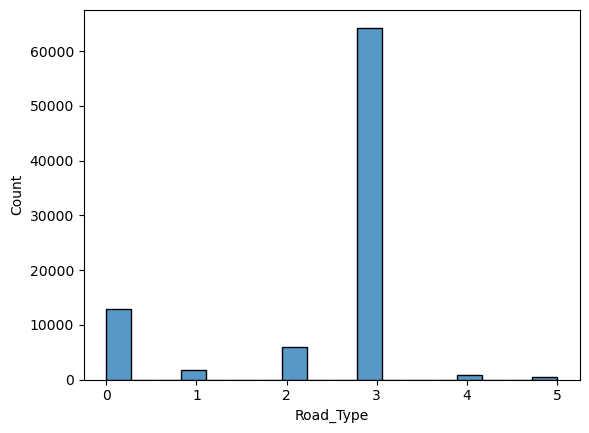

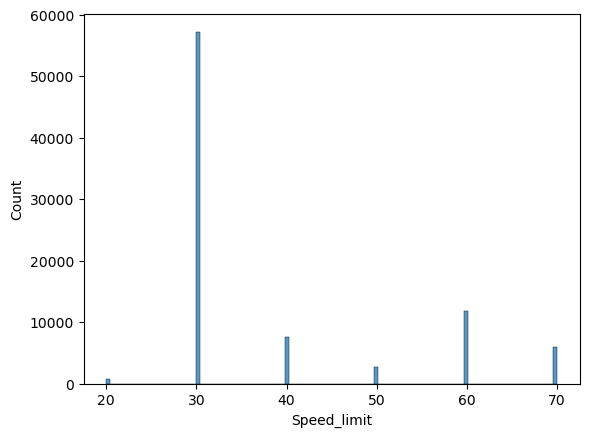

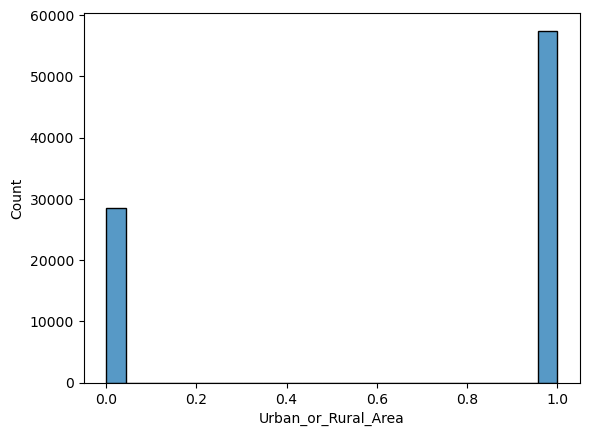

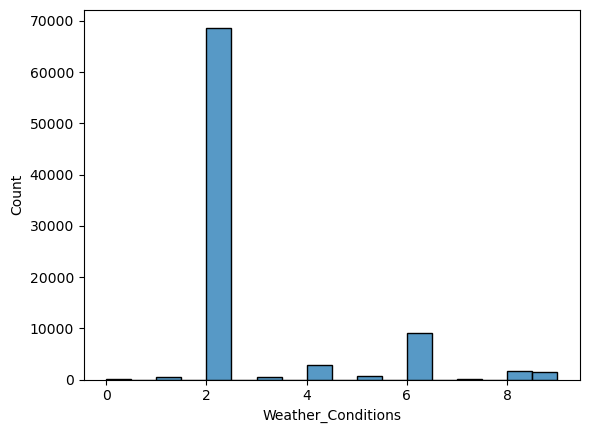

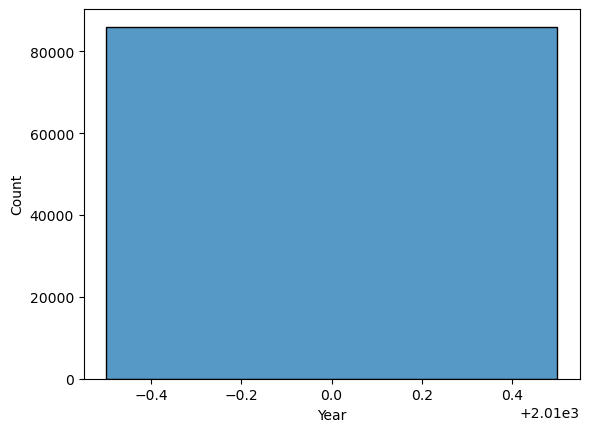

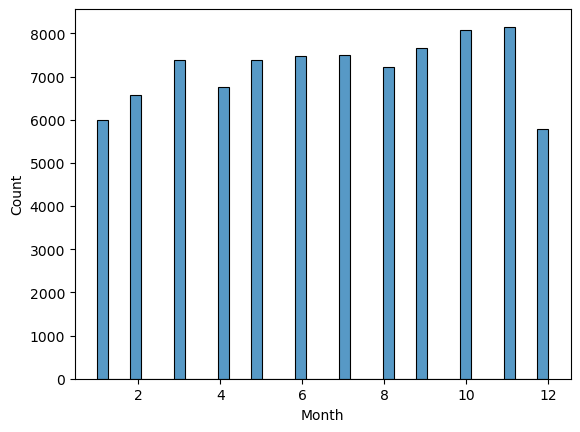

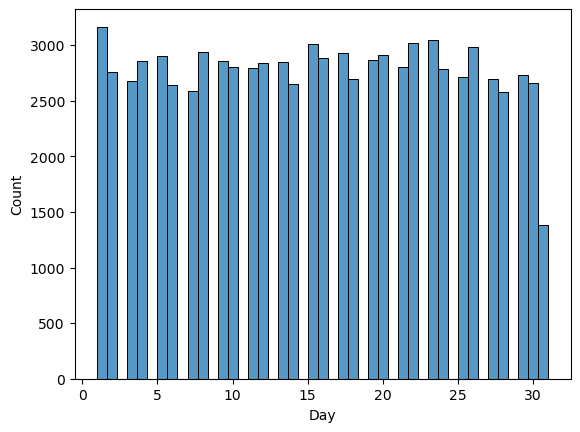

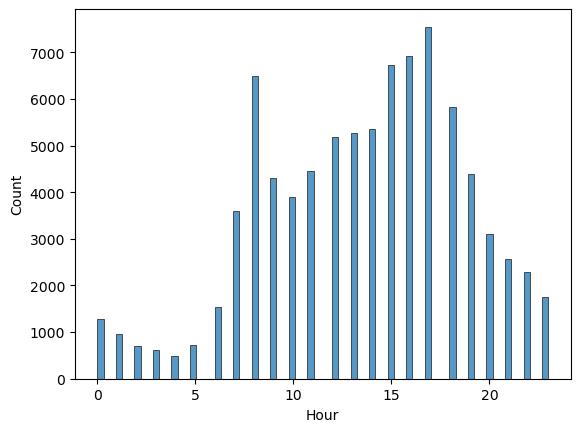

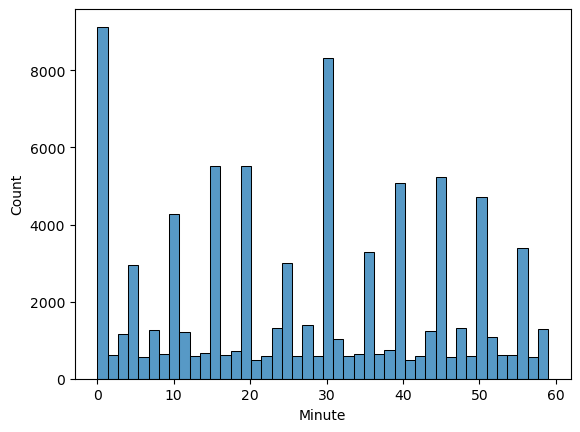

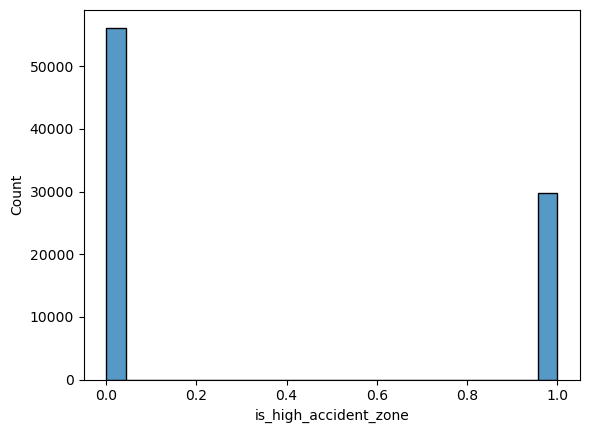

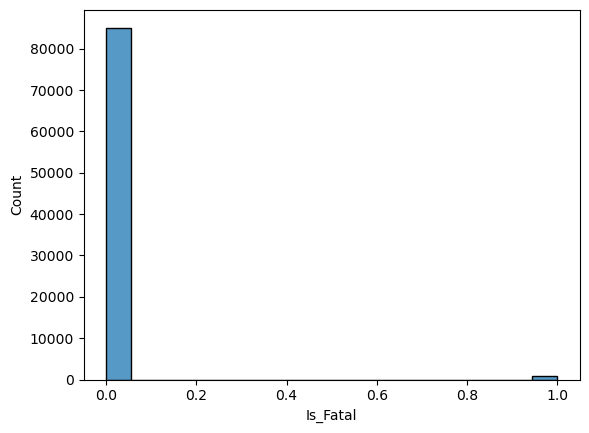

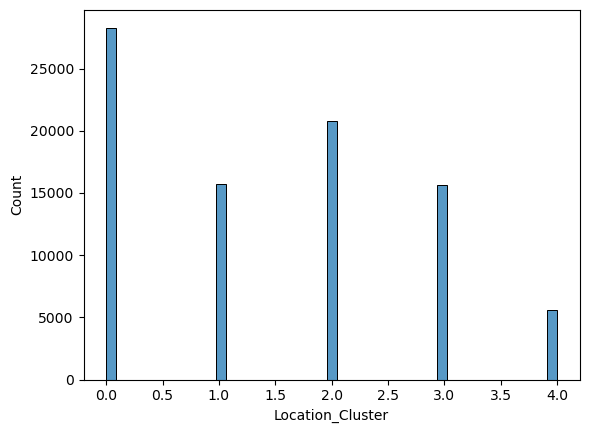

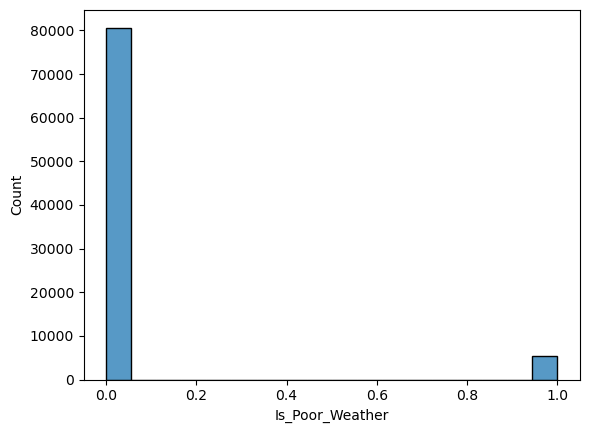

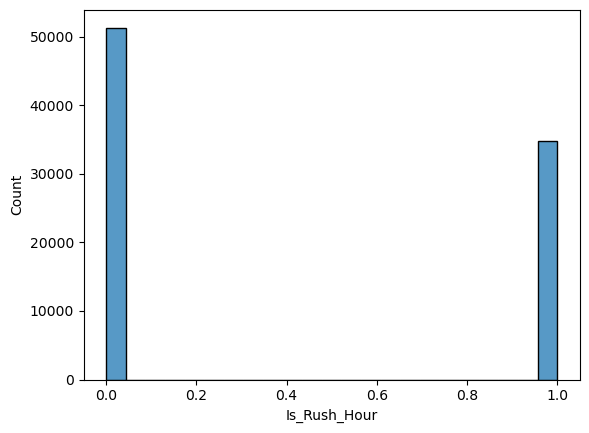

In [17]:
#Histogram to understand the distribution

warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

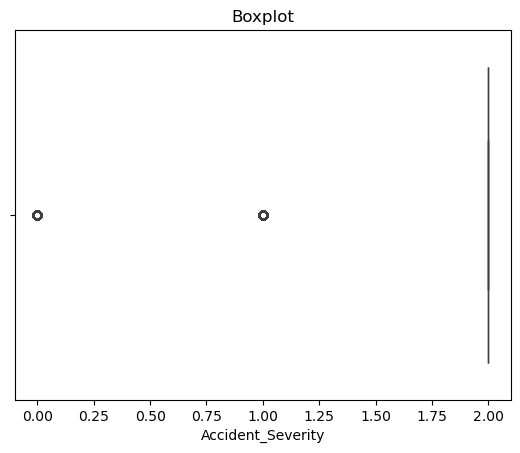

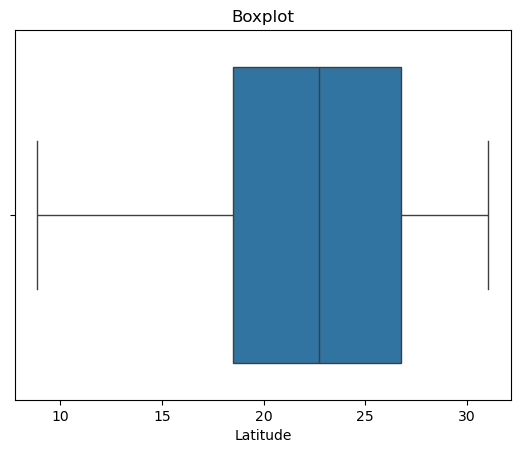

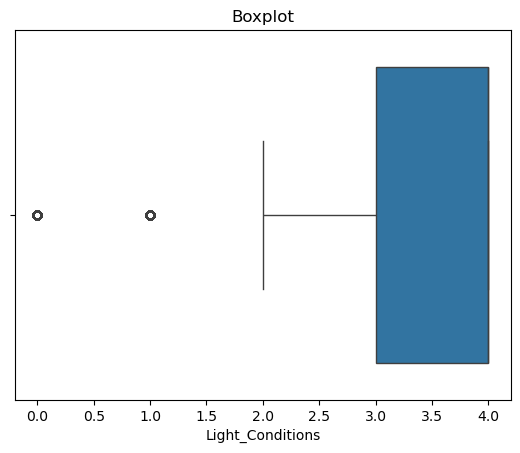

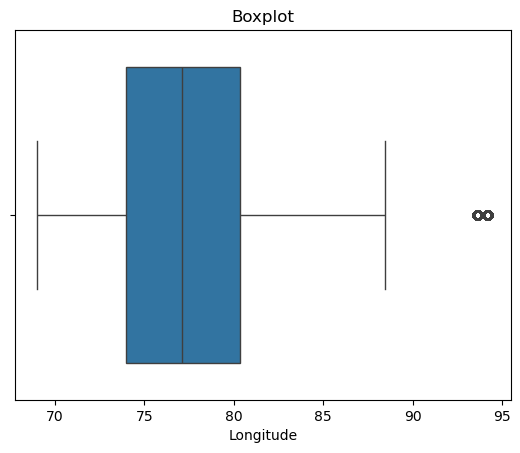

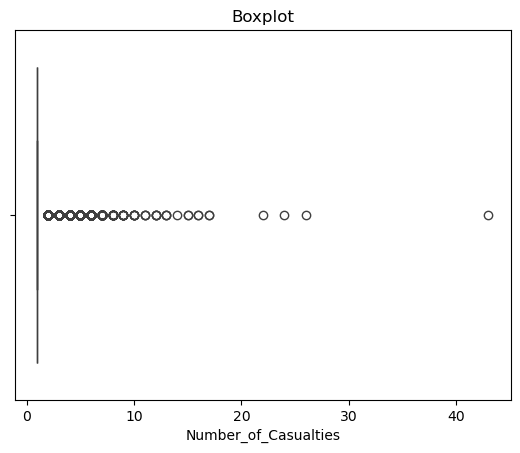

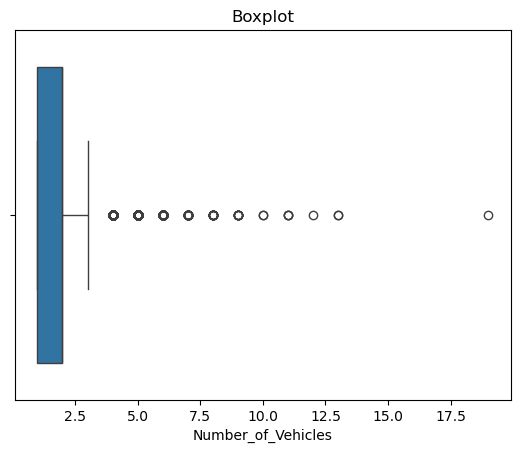

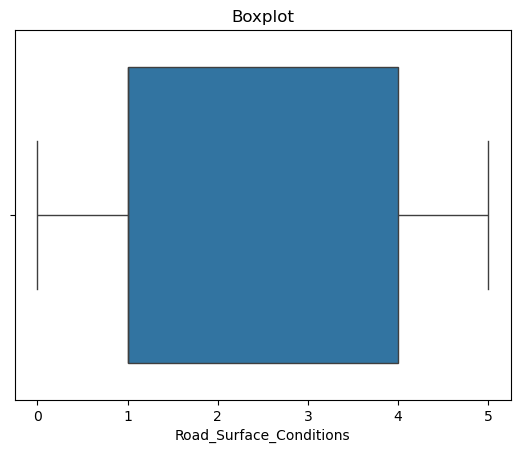

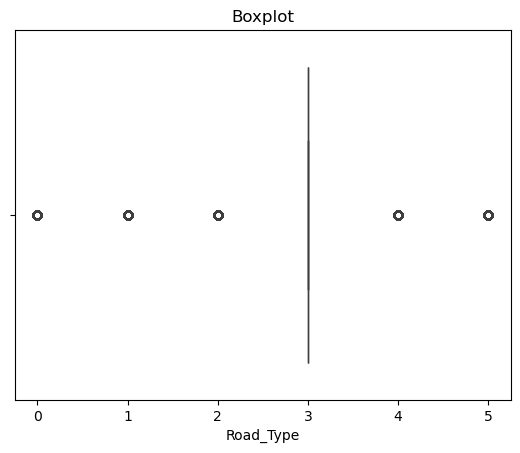

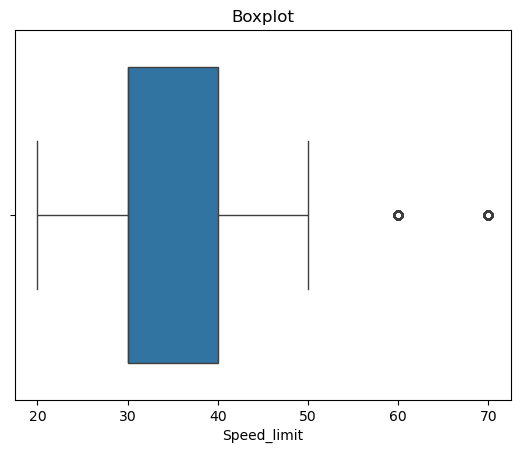

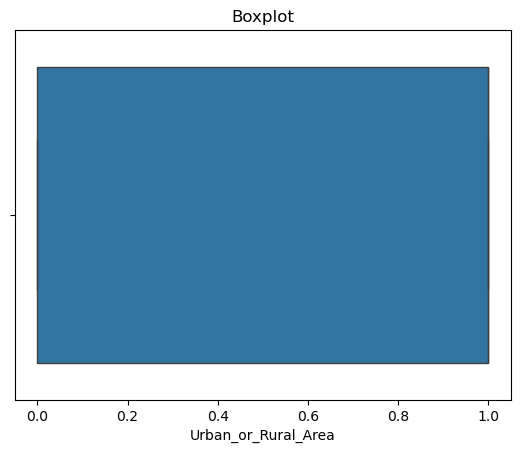

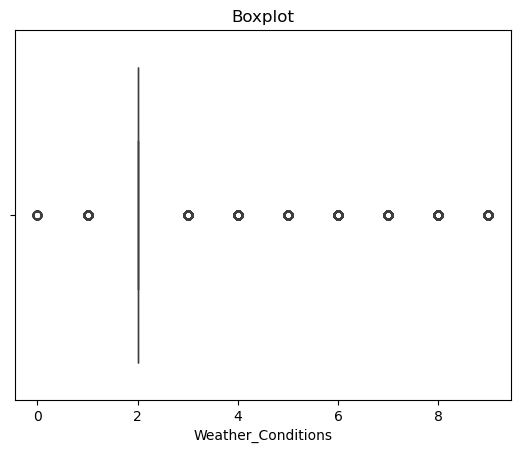

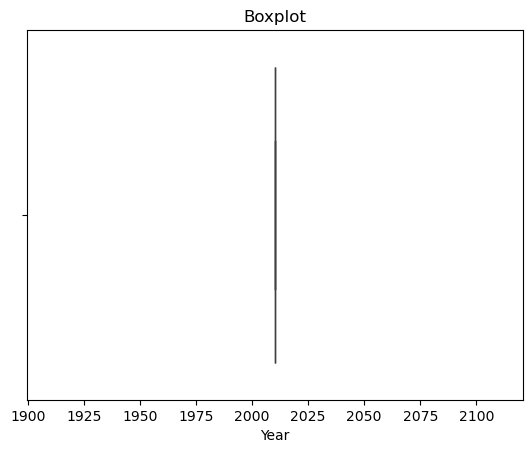

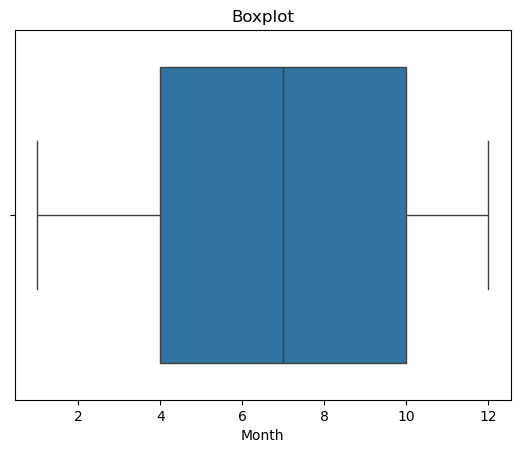

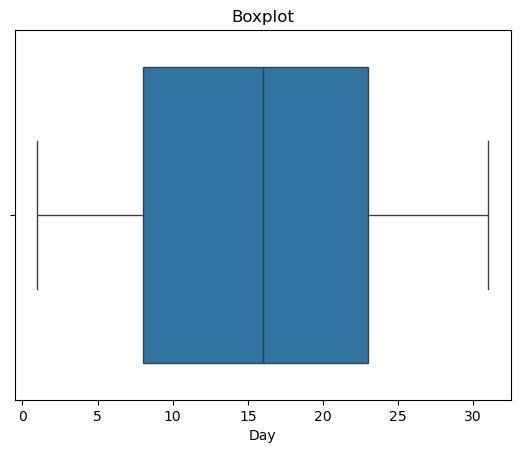

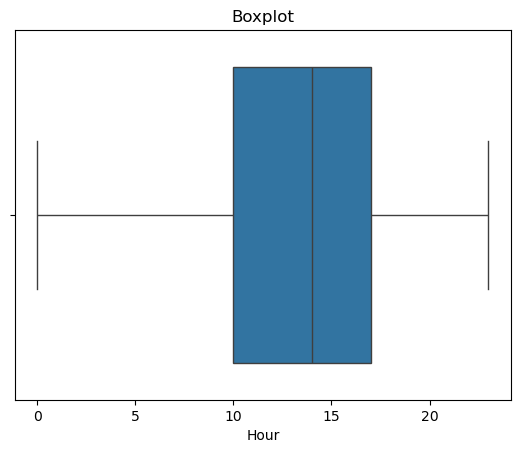

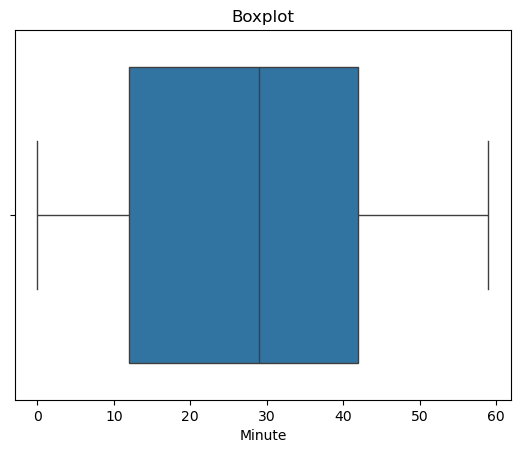

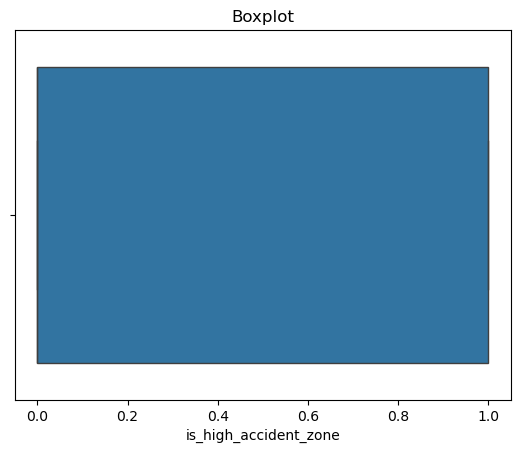

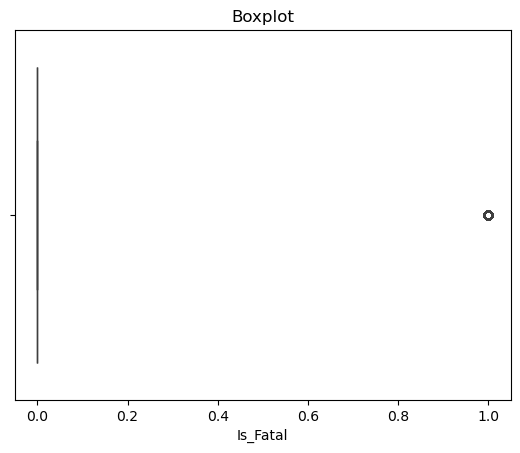

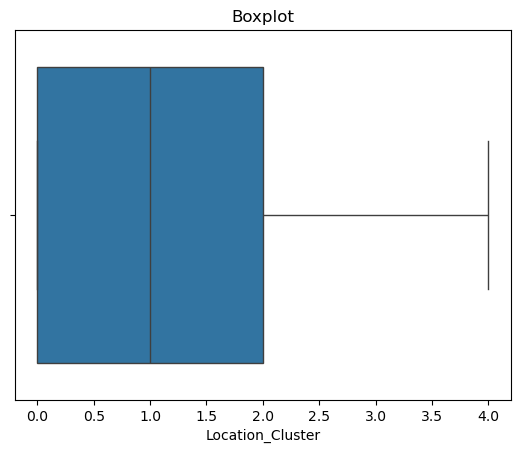

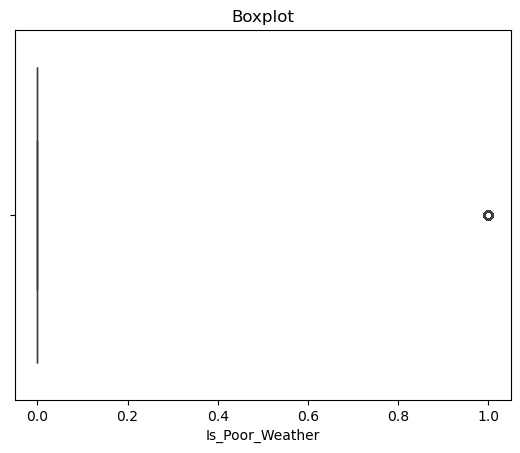

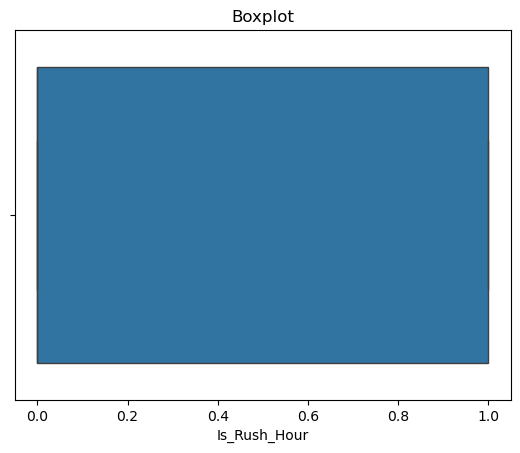

In [18]:
#Boxplot to understand the distribution

warnings.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
    plt.title('Boxplot')
    sns.boxplot(data=df , x=i)
    plt.show()

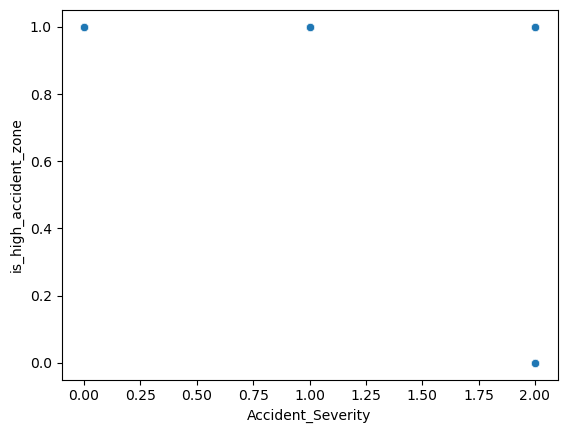

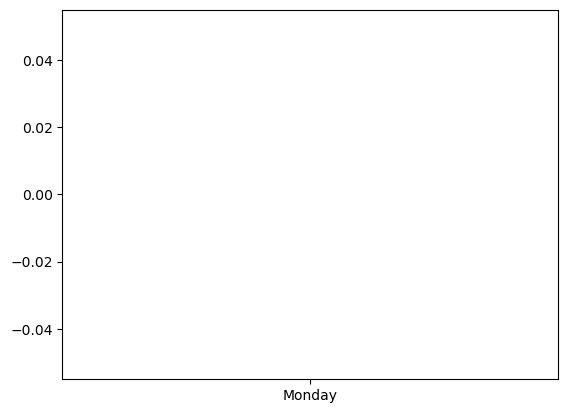

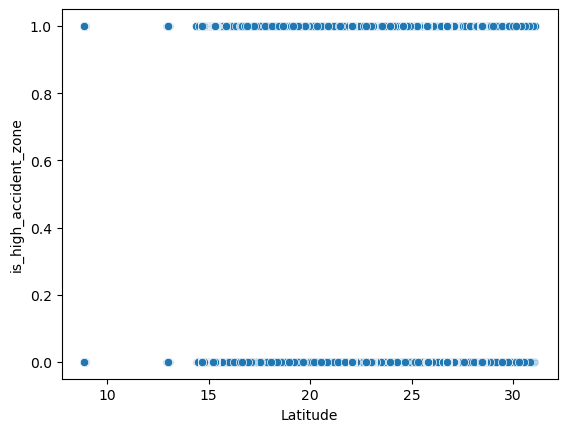

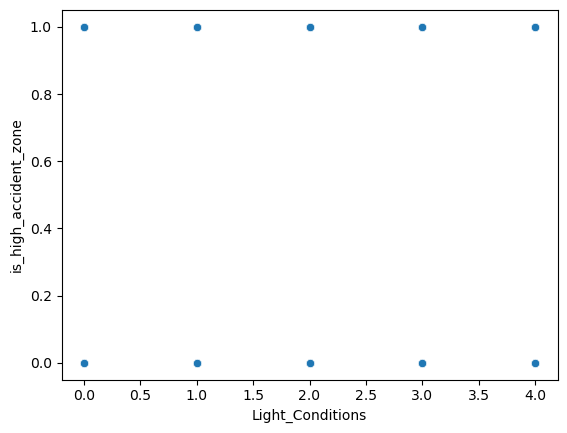

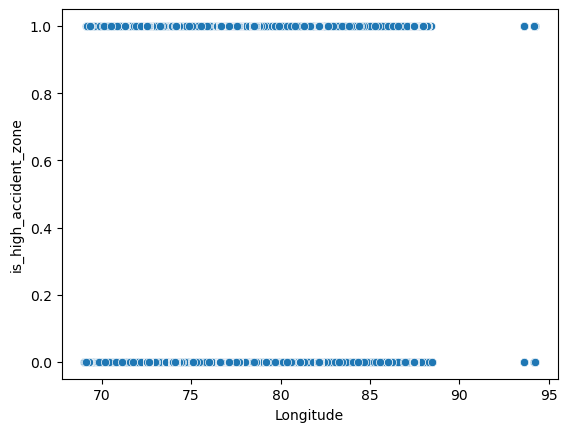

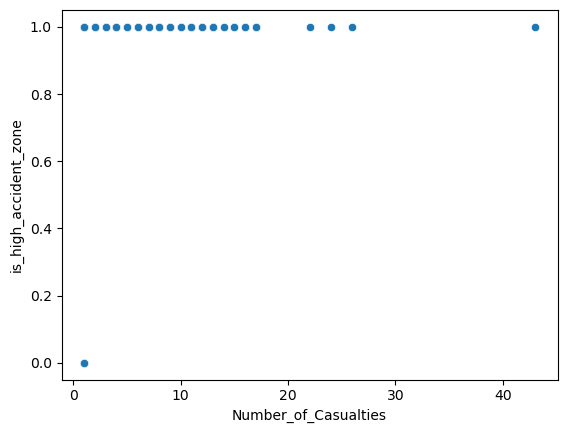

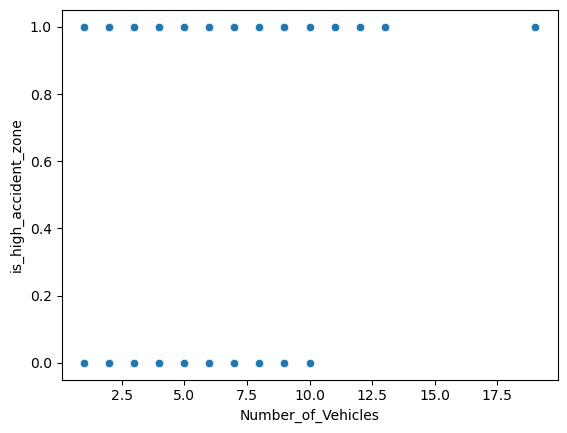

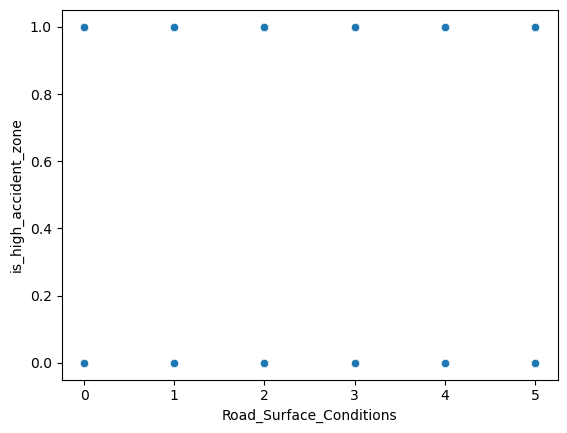

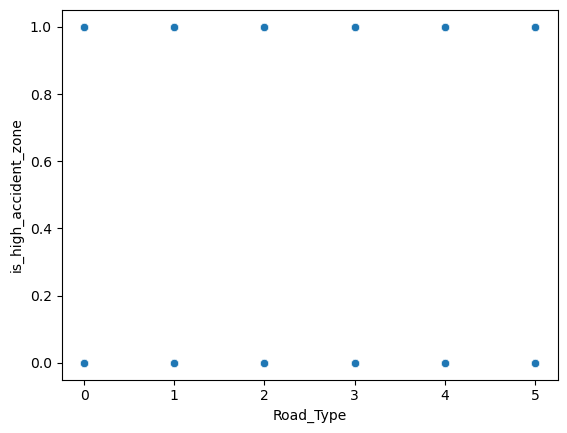

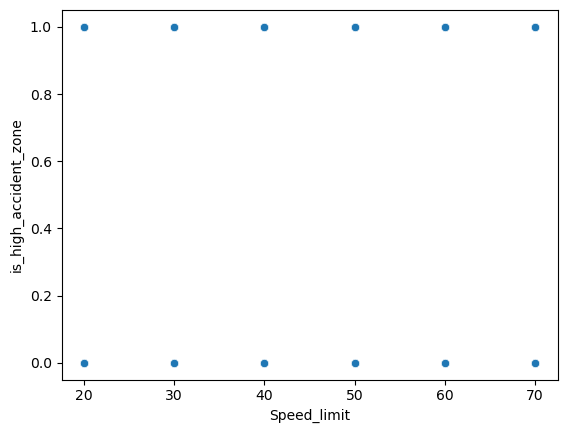

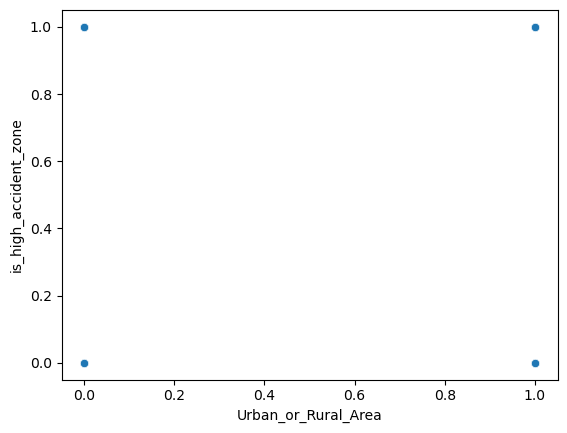

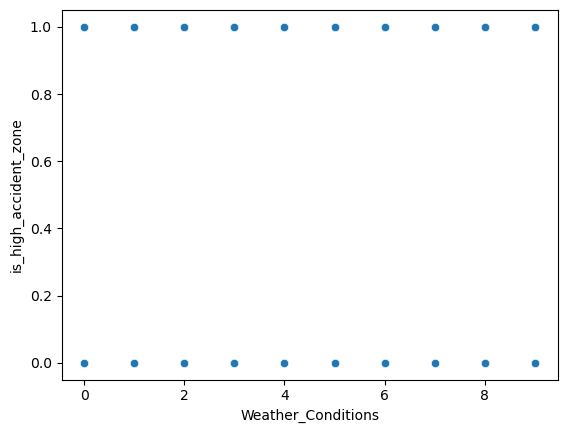

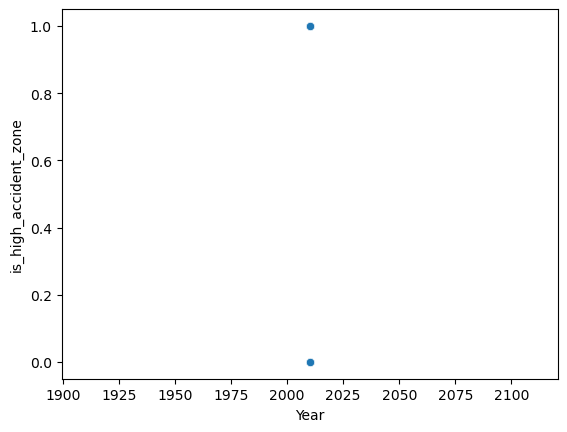

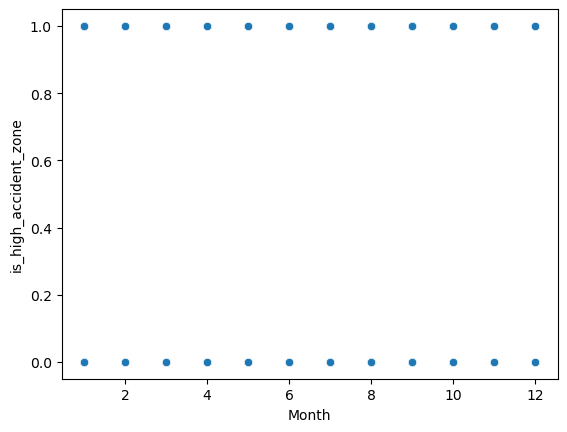

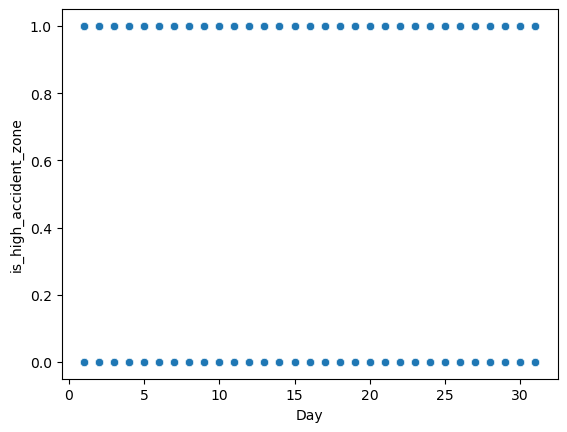

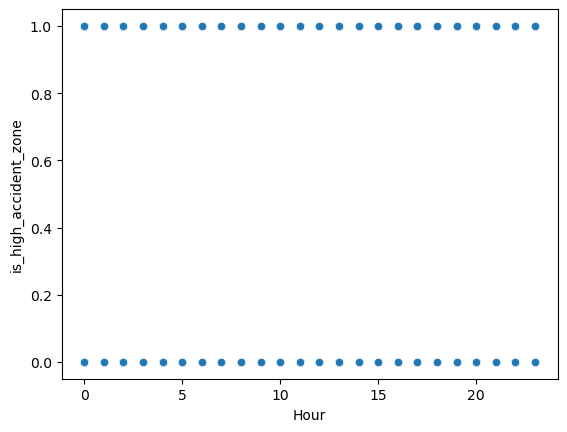

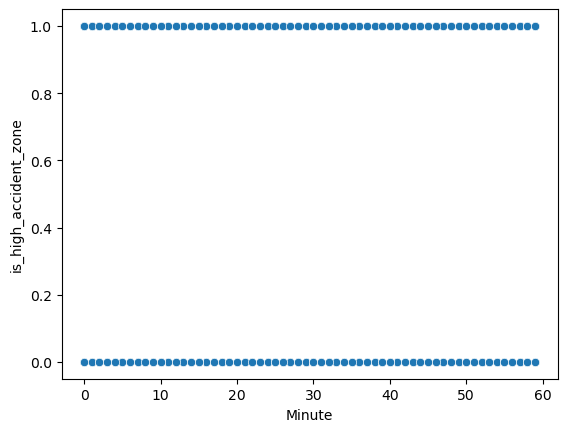

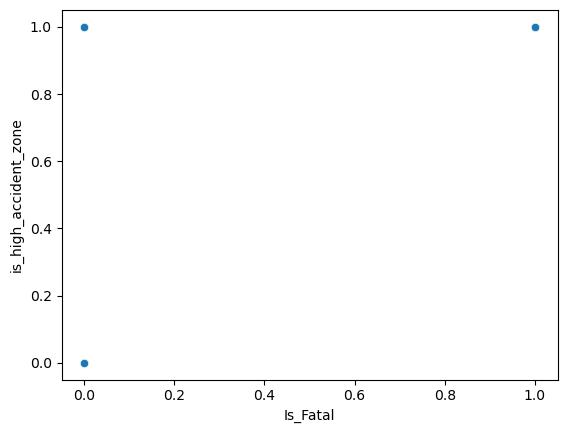

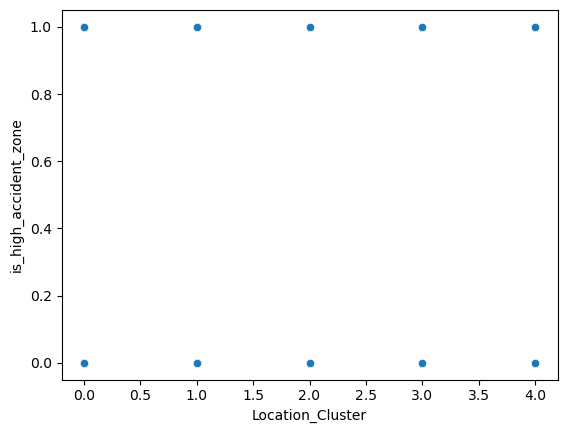

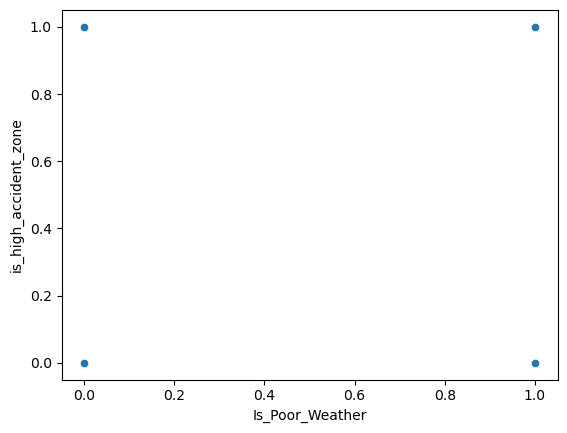

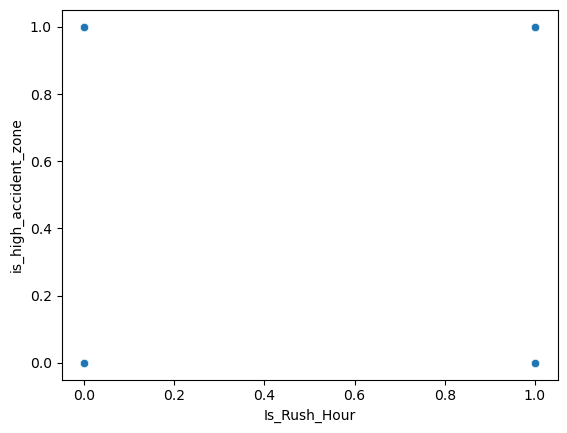

In [19]:
#Scatter plot to understand the rlationship
for i in ['Accident_Severity', 'Day_of_Week', 'Latitude', 'Light_Conditions', 'Longitude', 'Number_of_Casualties', 
          'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area',
          'Weather_Conditions', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Is_Fatal', 
          'Location_Cluster', 'Is_Poor_Weather', 'Is_Rush_Hour']:
    sns.scatterplot(data=df, x=i , y='is_high_accident_zone')
    plt.show()

In [20]:
df['Accident_Severity'].unique()

array([2, 1, 0], dtype=int64)

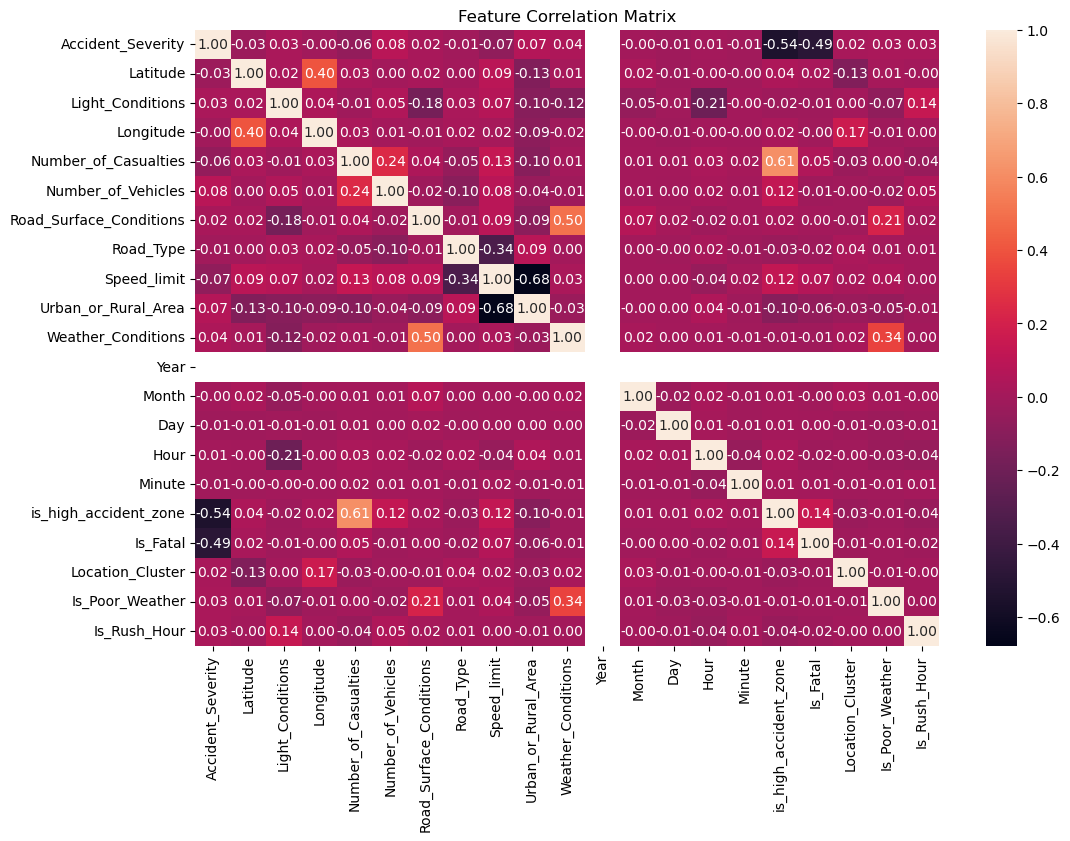

In [21]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

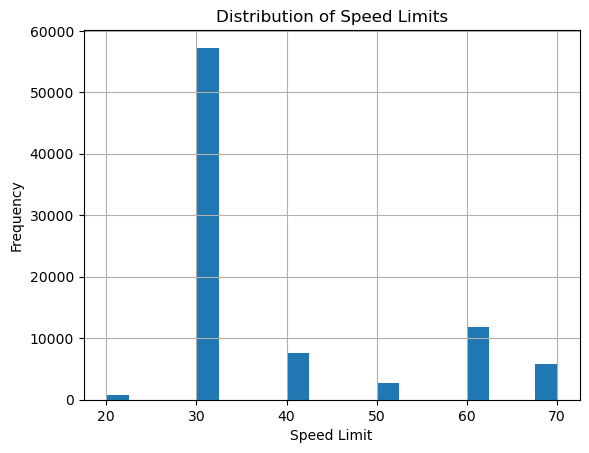

In [22]:
# Histograms
df['Speed_limit'].hist(bins=20)
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.title('Distribution of Speed Limits')
plt.show()

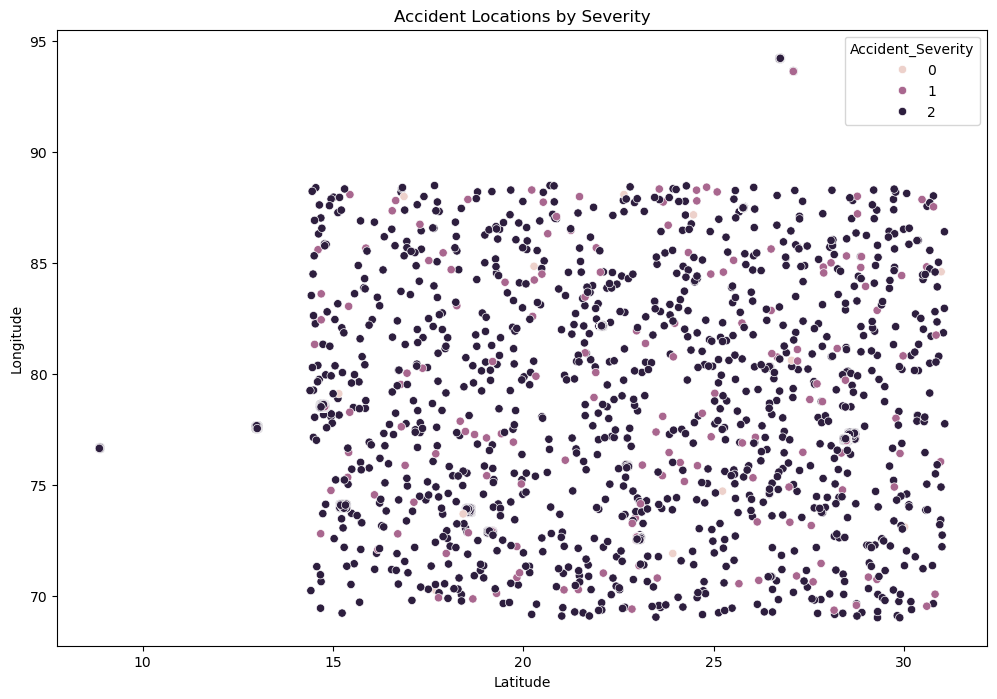

In [23]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Latitude', y='Longitude', hue='Accident_Severity', data=df)
plt.title('Accident Locations by Severity')
plt.show()

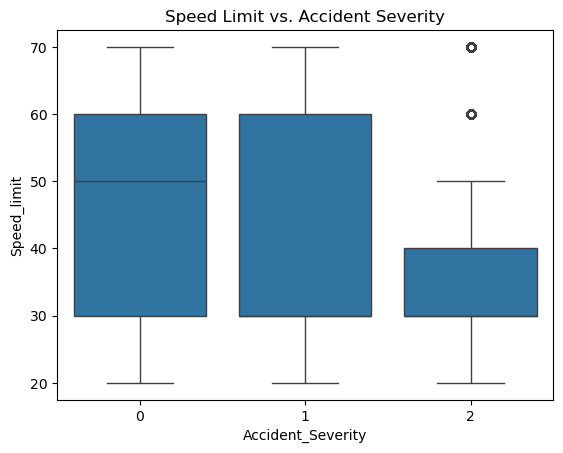

In [24]:
# Boxplot to compare 'Speed_limit' across 'Accident_Severity'
sns.boxplot(x='Accident_Severity', y='Speed_limit', data=df)
plt.title('Speed Limit vs. Accident Severity')
plt.show()

In [25]:
df.to_csv('ACCIDENT DATASET.csv', index=False)

In [28]:
print(df['Day_of_Week'].unique())

[NaN]
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']


In [34]:
df['Day_of_Week'] = df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0])

In [35]:
label_encoder = LabelEncoder()
df['Day_of_Week'] = label_encoder.fit_transform(df['Day_of_Week'])


# PART 6: Split the Data into Training and Testing Set

In [36]:
Y = df['is_high_accident_zone']       #Target(Y)
Y

0        0
1        0
2        0
3        0
4        0
        ..
85994    0
85995    0
85996    0
85997    0
85998    1
Name: is_high_accident_zone, Length: 85999, dtype: int64

In [37]:
X =df.drop('is_high_accident_zone',axis= 1)      #Featutes(X-values)
X

,Accident_Severity,Day_of_Week,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,...,Weather_Conditions,Year,Month,Day,Hour,Minute,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
0,2,0,14.724026,4,78.610393,1,1,3,3,60,...,4,2010,12,9,15,41,0,3,1,0
1,2,0,14.762353,3,78.534042,1,1,3,3,60,...,4,2010,12,27,21,31,0,3,1,0
2,2,0,14.745606,4,78.470877,1,2,5,3,30,...,2,2010,11,8,15,50,0,3,0,0
3,2,0,14.667128,4,78.557994,1,2,1,3,30,...,2,2010,10,16,13,50,0,3,0,0
4,2,0,14.703443,4,78.576431,1,1,4,1,30,...,8,2010,12,21,13,59,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85994,2,0,8.884765,4,76.621426,1,2,1,3,30,...,2,2010,8,24,15,45,0,3,0,0
85995,2,0,8.866606,4,76.669196,1,2,1,3,30,...,2,2010,10,1,17,14,0,3,0,1
85996,2,0,8.865684,4,76.639612,1,2,1,3,30,...,2,2010,8,29,18,19,0,3,0,1
85997,2,0,22.732825,1,77.106322,1,1,1,2,30,...,2,2010,8,31,22,55,0,0,0,0


In [38]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train

,Accident_Severity,Day_of_Week,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,...,Weather_Conditions,Year,Month,Day,Hour,Minute,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
1288,2,0,14.714553,4,78.546401,1,3,1,3,30,...,2,2010,5,21,8,25,0,3,0,1
29944,1,0,26.461204,4,74.591508,3,2,1,3,60,...,2,2010,3,4,14,30,0,2,0,0
85577,2,0,8.886478,1,76.637664,1,1,1,3,30,...,2,2010,5,22,0,30,0,3,0,0
41134,2,0,28.676652,4,77.223262,1,2,1,3,30,...,2,2010,6,29,12,34,0,2,0,0
53063,2,0,18.568112,4,73.778210,2,3,1,3,30,...,2,2010,6,3,16,34,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,0,26.728568,4,94.212588,1,2,1,3,30,...,2,2010,9,1,8,53,0,1,0,1
54886,2,0,19.195761,1,72.862721,1,1,5,1,30,...,2,2010,12,16,16,3,0,0,0,1
76820,2,0,22.965830,4,72.659279,1,1,1,3,30,...,2,2010,3,6,16,2,0,0,0,1
860,2,0,14.694177,3,78.626471,1,1,1,3,60,...,9,2010,8,15,1,20,0,3,0,0


In [39]:
X_test

,Accident_Severity,Day_of_Week,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,...,Weather_Conditions,Year,Month,Day,Hour,Minute,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
68393,2,0,25.785527,4,87.459413,1,1,3,3,60,...,4,2010,3,5,7,4,0,1,1,1
27305,2,0,22.719545,4,75.910615,1,2,1,3,30,...,2,2010,11,15,20,1,0,0,0,0
19821,2,0,28.470254,1,77.092811,3,2,1,2,30,...,2,2010,4,11,19,55,0,2,0,0
70107,2,0,25.782080,4,87.494232,1,2,5,3,30,...,2,2010,8,24,10,0,0,1,0,0
14592,2,0,15.278445,2,74.058735,2,1,5,0,70,...,2,2010,3,29,8,23,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69446,2,0,25.790854,4,87.479080,1,2,1,3,30,...,2,2010,5,19,17,57,0,1,0,1
65320,2,0,26.723480,4,94.210086,2,2,5,3,30,...,2,2010,10,23,14,50,0,1,0,0
15192,2,0,15.187237,4,74.136868,1,2,1,3,20,...,2,2010,6,8,17,20,0,0,0,1
45187,2,0,18.554935,4,73.796349,1,2,1,3,30,...,2,2010,9,17,13,15,0,0,0,0


In [40]:
from imblearn.over_sampling import SMOTE

# Handle Class Imbalance using SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Check the distribution of classes after SMOTE
print("Class distribution after SMOTE:", pd.Series(Y_train_resampled).value_counts())

Class distribution after SMOTE: is_high_accident_zone
0    44870
1    44870
Name: count, dtype: int64


In [41]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X, Y)

# Check new class distribution
print(pd.Series(Y_resampled).value_counts())

is_high_accident_zone
0    29824
1    29824
Name: count, dtype: int64


In [42]:
X_train_resampled

,Accident_Severity,Day_of_Week,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,...,Weather_Conditions,Year,Month,Day,Hour,Minute,Is_Fatal,Location_Cluster,Is_Poor_Weather,Is_Rush_Hour
0,2,0,14.714553,4,78.546401,1,3,1,3,30,...,2,2010,5,21,8,25,0,3,0,1
1,1,0,26.461204,4,74.591508,3,2,1,3,60,...,2,2010,3,4,14,30,0,2,0,0
2,2,0,8.886478,1,76.637664,1,1,1,3,30,...,2,2010,5,22,0,30,0,3,0,0
3,2,0,28.676652,4,77.223262,1,2,1,3,30,...,2,2010,6,29,12,34,0,2,0,0
4,2,0,18.568112,4,73.778210,2,3,1,3,30,...,2,2010,6,3,16,34,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,1,0,18.525203,4,73.877755,2,1,1,3,30,...,2,2010,4,1,13,10,0,0,0,0
89736,2,0,23.295114,4,72.499921,2,2,1,3,30,...,2,2010,6,3,17,30,0,0,0,1
89737,1,0,27.100098,1,93.624211,1,2,2,1,30,...,3,2010,10,24,0,0,0,1,0,0
89738,1,0,19.093603,3,72.956771,3,2,1,0,40,...,2,2010,3,14,15,44,0,0,0,0


In [43]:
Y_train_resampled

0        0
1        1
2        0
3        0
4        1
        ..
89735    1
89736    1
89737    1
89738    1
89739    1
Name: is_high_accident_zone, Length: 89740, dtype: int64

# PART 7: Creating and Training Model

In [44]:
#Random Forest Classifier

rf_Model = RandomForestClassifier(max_features=None, n_estimators=100,min_samples_leaf=50, oob_score=True, n_jobs=-1, random_state=42,class_weight='balanced')
rf_Model.fit(X_train_resampled,Y_train_resampled)

joblib.dump(rf_Model, 'RandomForestModel.pkl')

['RandomForestModel.pkl']

In [45]:
#XGBoost 
xgboost_Model = XGBClassifier(class_weight='balanced')
xgboost_Model.fit(X_train_resampled,Y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# PART 8: Make Predictions

In [46]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


rf_pred = rf_Model.predict(X_test)
xgboost_pred = xgboost_Model.predict(X_test)

print(f"Random Forest predictions: {rf_pred}")
print(f"XGBoost predictions: {xgboost_pred}")

Random Forest predictions: [0 0 1 ... 0 0 0]
XGBoost predictions: [0 0 1 ... 0 0 0]


In [47]:
print("Random Forest Classification Report:\n",classification_report(Y_test ,rf_pred, zero_division=0)) 
print("XGBoost Classification report:\n", classification_report(Y_test,xgboost_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11305
           1       1.00      1.00      1.00      5895

    accuracy                           1.00     17200
   macro avg       1.00      1.00      1.00     17200
weighted avg       1.00      1.00      1.00     17200

XGBoost Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11305
           1       1.00      1.00      1.00      5895

    accuracy                           1.00     17200
   macro avg       1.00      1.00      1.00     17200
weighted avg       1.00      1.00      1.00     17200



In [48]:
print("Random Forest confusion matrix :\n", confusion_matrix(Y_test ,rf_pred)) 
print("XGBoost confusion matrix:\n", confusion_matrix(Y_test,xgboost_pred))

Random Forest confusion matrix :
 [[11305     0]
 [    0  5895]]
XGBoost confusion matrix:
 [[11305     0]
 [    0  5895]]


In [49]:
#Hyperparameter Tunning

from sklearn.model_selection import RandomizedSearchCV

#Tuning Random Forest
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_Model, param_distributions=param_dist,
                                       n_iter=5, cv=2, scoring='f1_macro', n_jobs=-1)

# Fit the model
try:
    random_search_rf.fit(X_train_resampled, Y_train_resampled)
    
    # Output best parameters and score
    print("Best parameters for Random Forest:", random_search_rf.best_params_)
    print("Best F1 score for Random Forest:", random_search_rf.best_score_)
except Exception as e:
    print(f"Error during Randomized Search: {e}")

Best parameters for Random Forest: {'n_estimators': 200, 'max_depth': 10}
Best F1 score for Random Forest: 1.0


# PART 9 : Evaluate and Improve

In [50]:
#Evaluation
rf_accuracy = accuracy_score(Y_test ,rf_pred )
xgboost_accuracy =accuracy_score(Y_test, xgboost_pred)


print(f"Random Forest Classifier accuracy : {rf_accuracy}")
print(f"XGBoost accuracy: {xgboost_accuracy}")

Random Forest Classifier accuracy : 1.0
XGBoost accuracy: 1.0


In [51]:
from sklearn.ensemble import VotingClassifier

# Define the models
rf_Model = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost_Model = XGBClassifier(n_estimators= 100)
#use_label_encoder=False,

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_Model),
    ('xgb',xgboost_Model)
], voting='soft')  # Use soft voting to consider predicted probabilities

# Fit the voting classifier
voting_clf.fit(X_resampled, Y_resampled)

# Predict on test data
Y_pred = voting_clf.predict(X_test)

# Generate classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11305
           1       1.00      1.00      1.00      5895

    accuracy                           1.00     17200
   macro avg       1.00      1.00      1.00     17200
weighted avg       1.00      1.00      1.00     17200

